In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [2]:
cust = pd.read_csv('.././data/Customer Acqusition.csv')
payment = pd.read_csv('.././data/Repayment.csv')
spend = pd.read_csv('.././data/spend.csv')

## Exploratory Data Analysis(EDA)

**1. Customer Acquistion Table**

In [3]:
cust.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [4]:
cust.shape

(100, 8)

In [5]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [6]:
cust.describe().loc[['count', 'mean', 'std', 'min', '50%', 'max']]

,No,Age,Limit
count,100.000000,100.000000,100.000000
mean,50.500000,46.490000,284700.610000
std,29.011492,18.282572,218494.967852
min,1.000000,12.000000,10000.000000
50%,50.500000,46.500000,300001.500000
max,100.000000,79.000000,500000.000000


In [7]:
cat_cols = ['City', 'Product', 'Segment']

for col in cat_cols:
    print(cust[col].value_counts())

City
COCHIN        20
BANGALORE     19
CALCUTTA      18
BOMBAY        14
CHENNAI        8
DELHI          7
PATNA          7
TRIVANDRUM     7
Name: count, dtype: int64
Product
Gold        38
Platimum    32
Silver      30
Name: count, dtype: int64
Segment
Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: count, dtype: int64


In [8]:
# Checking for null values
cust.isna().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

**2. Repayment Table**

In [9]:
payment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [10]:
payment.shape

(1523, 5)

In [11]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


In [12]:
payment.isna().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

**3. Spend Table**

In [13]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [14]:
spend.shape

(1500, 5)

In [15]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [16]:
spend['Type'].value_counts()

Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
SHOPPING        113
BUS TICKET       99
JEWELLERY        95
CLOTHES          95
RENTAL           76
MOVIE TICKET     76
BIKE             49
AUTO             40
CAR              30
SANDALS          28
Name: count, dtype: int64

In [17]:
spend.isna().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

## Data Cleaning

**1. Customer Acqusition Table**

In [18]:
# deleting unwanted columns
cust.drop(columns=['No'], inplace=True)

**2. Repayment Table**

In [19]:
# Deleting unwanted columns
payment.drop(columns=['SL No:', 'Unnamed: 4'], inplace=True)

In [20]:
# deleting empty rows
payment.dropna(inplace=True)

In [21]:
# chaging Month column datatype from Object to datetime
payment['Month'] = pd.to_datetime(payment['Month'], dayfirst=True, format='%d-%b-%y')

**3. Spend Table**

In [22]:
# deleting unwanted columns
spend.drop(columns=['Sl No:'], inplace=True)

In [23]:
# chaging Month column datatype from Object to datetime
spend['Month'] = pd.to_datetime(spend['Month'], dayfirst=True, format='%d-%b-%y')

## 🧹 Data Preprocessing Rules

1. If age < 18 → Replace with mean age.

In [24]:
mean_age = round(cust.loc[cust['Age'] >= 18, 'Age'].mean())
cust.loc[cust['Age'] < 18, 'Age'] = mean_age   

2. If spend > card limit → Replace with 50% of the limit.

In [25]:
spend = spend.merge(cust[['Customer', 'Limit']], on='Customer')
spend

,Customer,Month,Type,Amount,Limit
0,A1,2004-01-12,JEWELLERY,485470.80,500000.0
1,A1,2004-01-03,PETRO,410556.13,500000.0
2,A1,2004-01-15,CLOTHES,23740.46,500000.0
3,A1,2004-01-25,FOOD,484342.47,500000.0
4,A1,2005-01-17,CAMERA,369694.07,500000.0
...,...,...,...,...,...
1495,A67,2006-02-04,BUS TICKET,356872.73,500000.0
1496,A68,2006-03-25,BUS TICKET,204971.10,100000.0
1497,A69,2006-03-31,BUS TICKET,50449.44,10000.0
1498,A70,2006-03-23,BUS TICKET,80593.94,10001.0


In [26]:
spend[spend['Amount'] > spend['Limit']]

,Customer,Month,Type,Amount,Limit
7,A8,2004-02-05,BIKE,155562.58,100002.0
18,A19,2005-04-04,FOOD,441442.26,10000.0
19,A20,2006-04-30,JEWELLERY,356733.48,10001.0
20,A21,2004-04-25,PETRO,190011.63,10002.0
21,A22,2006-04-19,CLOTHES,423672.50,100000.0
...,...,...,...,...,...
1485,A59,2004-01-15,FOOD,181115.20,100003.0
1496,A68,2006-03-25,BUS TICKET,204971.10,100000.0
1497,A69,2006-03-31,BUS TICKET,50449.44,10000.0
1498,A70,2006-03-23,BUS TICKET,80593.94,10001.0


In [27]:
spend.loc[spend['Amount'] > spend['Limit'], 'Amount'] = spend['Limit'] * 0.5

In [28]:
spend.loc[spend['Amount'] > spend['Limit']]

,Customer,Month,Type,Amount,Limit


In [29]:
spend.drop(columns=['Limit'], inplace=True)

3. If repayment > card limit → Replace with the card limit.

In [30]:
payment = payment.merge(cust[['Customer', 'Limit']], on='Customer')

In [31]:
payment.loc[payment['Amount'] > payment['Limit']]

,Customer,Month,Amount,Limit
7,A8,2004-02-05,156913.59,100002.0
8,A9,2005-02-28,417294.81,100003.0
17,A18,2006-03-05,213352.06,100000.0
18,A19,2005-04-04,347826.27,10000.0
19,A20,2006-04-30,471099.22,10001.0
...,...,...,...,...
1483,A57,2004-03-19,207786.09,100001.0
1496,A68,2006-05-10,319836.49,100000.0
1497,A69,2006-07-11,247628.45,10000.0
1498,A70,2005-08-12,454016.51,10001.0


In [32]:
payment.loc[payment['Amount'] > payment['Limit'], 'Amount'] = payment['Limit']

In [33]:
payment.loc[payment['Amount'] > payment['Limit']]

,Customer,Month,Amount,Limit


In [34]:
payment.drop(columns=['Limit'], inplace=True)

## 📈 Analysis Tasks

### 🔢 Summaries to Extract

- Total number of unique customers

In [35]:
cust['Customer'].nunique()

100

- Total number of distinct product categories

In [36]:
cust['Product'].value_counts()

Product
Gold        38
Platimum    32
Silver      30
Name: count, dtype: int64

- Average monthly spend per customer

In [37]:
spend.groupby('Customer')['Amount'].mean().round()

Customer
A1      285706.0
A10     213746.0
A100     50000.0
A11     250957.0
A12     263969.0
          ...   
A95     240402.0
A96      54730.0
A97       5000.0
A98       5000.0
A99       5001.0
Name: Amount, Length: 100, dtype: float64

- Average monthly repayment per customer

In [38]:
payment.groupby('Customer')['Amount'].mean().round()

Customer
A1      264094.0
A10     205314.0
A100     69551.0
A11     295052.0
A12     268863.0
          ...   
A95     369406.0
A96     100000.0
A97      10000.0
A98      10001.0
A99      10002.0
Name: Amount, Length: 100, dtype: float64

- Monthly profit calculation based on 2.9% interest rate

In [39]:
monthly_spend = spend.groupby(spend['Month'].dt.strftime('%B'))['Amount'].sum().sort_values(ascending=False).reset_index(name='Total_Spend')
monthly_spend['Profit'] = monthly_spend['Total_Spend'] * 0.029
monthly_spend

,Month,Total_Spend,Profit
0,January,51571793.96,1.495582e+06
1,February,36000252.50,1.044007e+06
2,May,31841036.26,9.233901e+05
3,March,30455215.99,8.832013e+05
4,April,20255389.10,5.874063e+05
5,November,12635988.51,3.664437e+05
6,June,10194112.96,2.956293e+05
7,July,6985726.35,2.025861e+05
8,August,6961903.04,2.018952e+05
9,September,5927531.59,1.718984e+05


### 💡 Insights to Generate

- Top Product types

In [40]:
merge_df = spend.merge(cust, on='Customer')
merge_df.groupby('Product')['Amount'].sum().sort_values(ascending=False)

Product
Gold        1.462004e+08
Platimum    5.638741e+07
Silver      1.719332e+07
Name: Amount, dtype: float64

- City with highest total spend

In [41]:
merge_df.groupby('City')['Amount'].sum().nlargest(1)

City
COCHIN    45963513.5
Name: Amount, dtype: float64

- Age group spending the most

In [42]:
bins = [18, 35, 50, 65, 100]
labels = ['Young Adult', 'Adult', 'Middle Age', 'Senior']

merge_df['Age_Group'] = pd.cut(merge_df['Age'], bins=bins, labels=labels, right=False)
merge_df['Age_Group'].value_counts()

Age_Group
Adult          470
Young Adult    429
Middle Age     362
Senior         239
Name: count, dtype: int64

In [43]:
merge_df.groupby('Age_Group', observed=False)['Amount'].sum().nlargest(1)

Age_Group
Adult    83197413.81
Name: Amount, dtype: float64

- Top 10 customers based on total repayment

In [44]:
payment.groupby('Customer')['Amount'].sum().nlargest(10)

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Amount, dtype: float64

### 📍 City-Wise Analysis

- Annual spend per city by product with graphical representation

In [45]:
df = merge_df.groupby([merge_df['Month'].dt.strftime('%Y'), 'City', 'Product'])['Amount'].sum().reset_index(name='Total_Spend')
df

,Month,City,Product,Total_Spend
0,2004,BANGALORE,Gold,9289878.54
1,2004,BANGALORE,Platimum,1112732.30
2,2004,BANGALORE,Silver,1291852.58
3,2004,BOMBAY,Gold,6987853.53
4,2004,BOMBAY,Platimum,897264.94
...,...,...,...,...
67,2006,PATNA,Platimum,1256137.65
68,2006,PATNA,Silver,700005.00
69,2006,TRIVANDRUM,Gold,2735710.87
70,2006,TRIVANDRUM,Platimum,2147403.75


In [46]:
df.rename(columns={'Month': 'Year'}, inplace=True)
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         72 non-null     int64  
 1   City         72 non-null     object 
 2   Product      72 non-null     object 
 3   Total_Spend  72 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ KB


In [47]:
df['Total_Spend'] = round(df['Total_Spend']/ 1_000_000, 2)

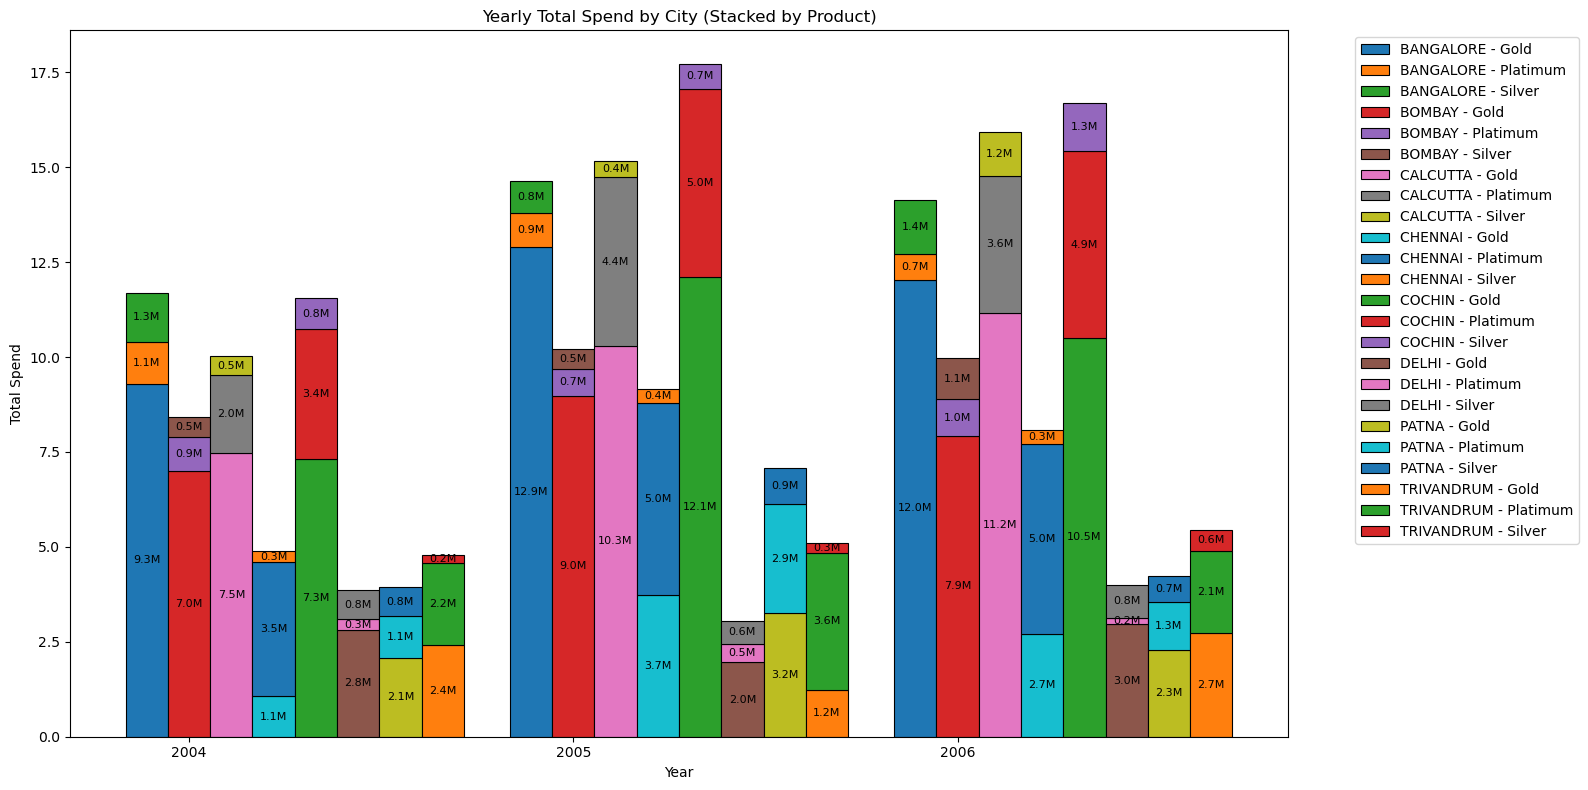

In [48]:
pivot_df = df.pivot_table(index=['Year', 'City'], columns='Product', values='Total_Spend').reset_index()

years = sorted(pivot_df['Year'].unique())
cities = pivot_df['City'].unique()
products = df['Product'].unique()

fig, ax = plt.subplots(figsize=(16, 8))

bar_width = 0.11

for i, city in enumerate(cities):
    city_data = pivot_df[pivot_df['City'] == city]
    x = [year + i * bar_width for year in city_data['Year']]
    bottom = [0] * len(city_data)

    for product in products:
        heights = city_data[product].values
        bars = ax.bar(x, heights, bottom=bottom, width=bar_width, label=f'{city} - {product}', edgecolor='black', linewidth=0.8)

        # Add labels
        for idx, rect in enumerate(bars):
            height = heights[idx]
            if height > 0:
                ax.text(rect.get_x() + rect.get_width() / 2,
                        bottom[idx] + height / 2,
                        f'{height:,.1f}M',
                        ha='center', va='center', fontsize=8, color='black')
                
        bottom = [sum(val) for val in zip(bottom, heights)]

# Formatting the chart
ax.set_xlabel("Year")
ax.set_ylabel("Total Spend")
ax.set_title("Yearly Total Spend by City (Stacked by Product)")
ax.set_xticks([y + bar_width for y in years])
ax.set_xticklabels(years)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(".././graphs/yearly_total_spend_by_city_stacked_by_product.png")
plt.show();

- Annual spend per product by city with graphical representation

In [49]:
df2 = merge_df.groupby([merge_df['Month'].dt.strftime('%Y'), 'Product', 'City'])['Amount'].sum().reset_index(name='Total_Spend')
df2

,Month,Product,City,Total_Spend
0,2004,Gold,BANGALORE,9289878.54
1,2004,Gold,BOMBAY,6987853.53
2,2004,Gold,CALCUTTA,7477140.98
3,2004,Gold,CHENNAI,1059618.50
4,2004,Gold,COCHIN,7315850.15
...,...,...,...,...
67,2006,Silver,CHENNAI,350009.50
68,2006,Silver,COCHIN,1269990.87
69,2006,Silver,DELHI,854899.97
70,2006,Silver,PATNA,700005.00


In [50]:
df2.rename(columns={'Month': 'Year'}, inplace=True)
df2['Year'] = df['Year'].astype(int)
df2['Total_Spend'] = round(df2['Total_Spend']/ 1_000_000, 2)

In [51]:
pivot_df2 = df2.pivot_table(index=['Year', 'Product'], columns='City', values='Total_Spend').reset_index()
pivot_df2

City,Year,Product,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
0,2004,Gold,9.29,6.99,7.48,1.06,7.32,2.81,2.07,2.42
1,2004,Platimum,1.11,0.90,2.04,3.54,3.42,0.28,1.11,2.16
2,2004,Silver,1.29,0.53,0.50,0.28,0.81,0.77,0.76,0.21
3,2005,Gold,12.89,8.98,10.30,3.74,12.11,1.96,3.25,1.24
4,2005,Platimum,0.91,0.71,4.43,5.05,4.96,0.49,2.88,3.60
5,2005,Silver,0.83,0.51,0.44,0.38,0.65,0.61,0.95,0.27
6,2006,Gold,12.03,7.92,11.17,2.70,10.50,2.96,2.28,2.74
7,2006,Platimum,0.69,0.97,3.59,5.02,4.92,0.18,1.26,2.15
8,2006,Silver,1.42,1.09,1.16,0.35,1.27,0.85,0.70,0.56


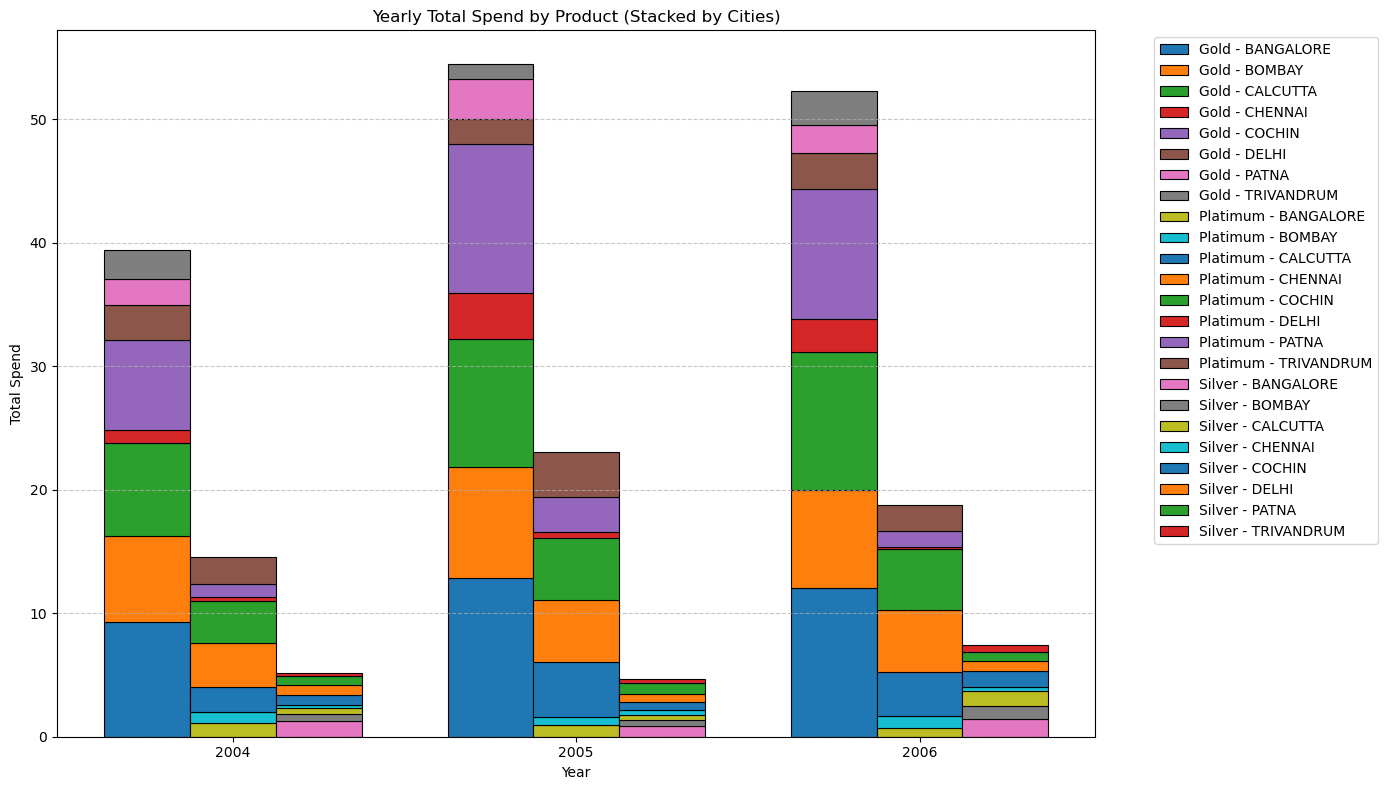

In [52]:
years = sorted(pivot_df2['Year'].unique())
cities = df2['City'].unique()
products = pivot_df2['Product'].unique()

fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.25

for i, product in enumerate(products):
    product_data = pivot_df2[pivot_df2['Product'] == product]
    x = [year + i * bar_width for year in product_data['Year']]
    bottom = [0] * len(product_data)

    for city in cities:
        heights = product_data[city].values
        ax.bar(x, heights, bottom=bottom, width=bar_width, label=f'{product} - {city}', edgecolor='black', linewidth=0.8)        
        bottom = [sum(val) for val in zip(bottom, heights)]

# Formatting the chart
ax.set_xlabel("Year")
ax.set_ylabel("Total Spend")
ax.set_title("Yearly Total Spend by Product (Stacked by Cities)")
ax.set_xticks([y + bar_width for y in years])
ax.set_xticklabels(years)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(".././graphs/yearly_total_spend_by_product_stacked_by_cities.png")
plt.show();

## 📉 Graphs to Visualize

- Monthly spend comparison, city-wise

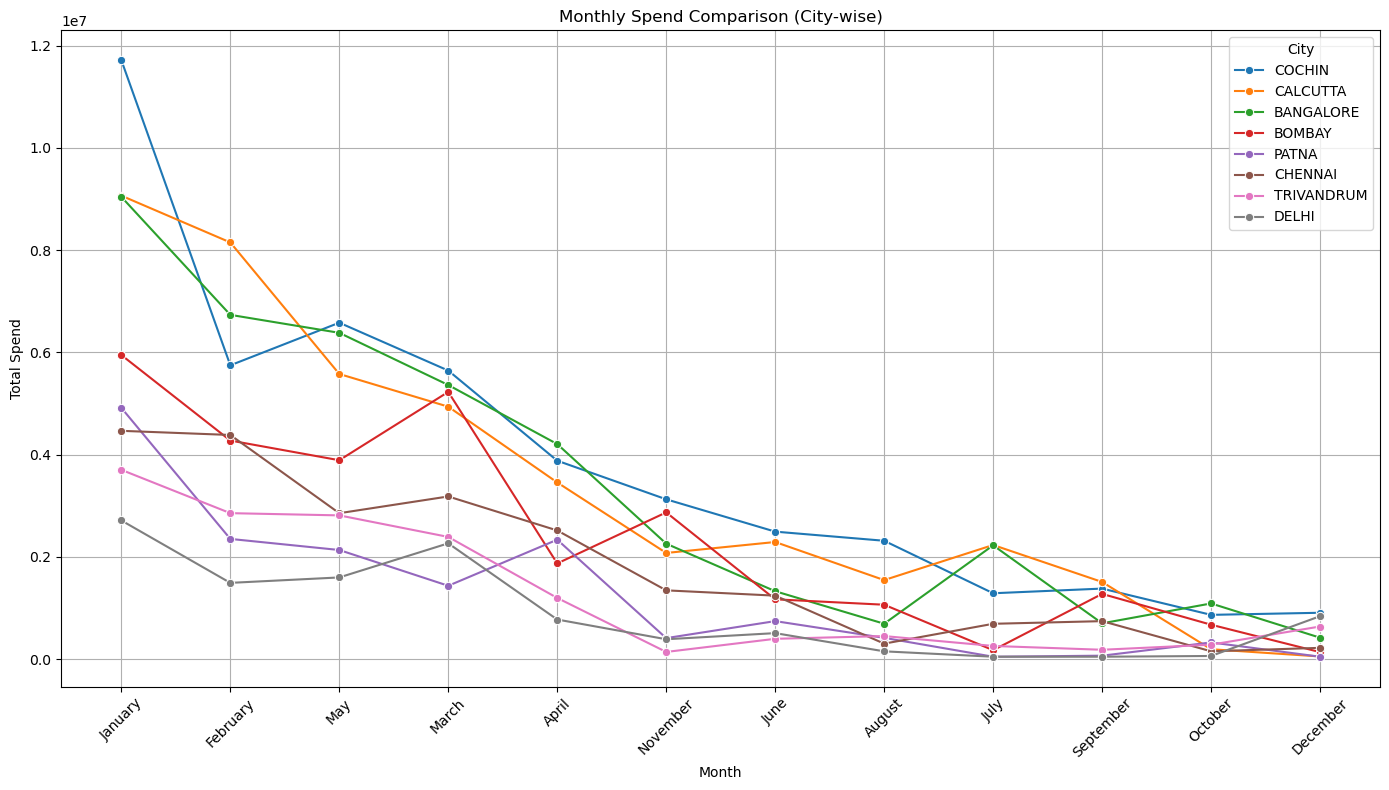

In [53]:
monthly_spend = merge_df.groupby(['City', merge_df['Month'].dt.strftime('%B')])['Amount'].sum().sort_values(ascending=False).reset_index(name='Total_Spend')
monthly_spend['Month'] = monthly_spend['Month'].astype(str)

plt.figure(figsize=(14, 8))
sns.lineplot(monthly_spend, x='Month', y='Total_Spend', hue='City', marker='o')


plt.title('Monthly Spend Comparison (City-wise)')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('.././graphs/monthly_spend_city_wise.png')
plt.show()


- Yearly spend on air tickets

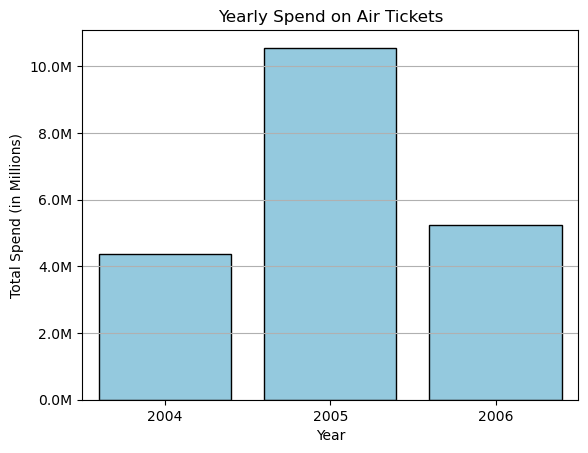

In [54]:
air_spend_yearly = spend[spend['Type'] == 'AIR TICKET']
air_spend_yearly = air_spend_yearly.groupby(spend['Month'].dt.to_period('Y'))['Amount'].sum().reset_index(name='Total_Spend')

air_spend_yearly.rename(columns={'Month': 'Year'}, inplace=True)

air_spend_yearly['Year'] = air_spend_yearly['Year'].astype(str)

sns.barplot(air_spend_yearly, x='Year', y='Total_Spend',  color='skyblue', edgecolor='black')


plt.title('Yearly Spend on Air Tickets')
plt.xlabel('Year')
plt.ylabel('Total Spend (in Millions)')
plt.grid(True, axis='y')

# Convert to millions
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

plt.savefig('.././graphs/yearly_air_ticket_spend.png')
plt.show()


- Monthly product spend trends (for seasonality detection)

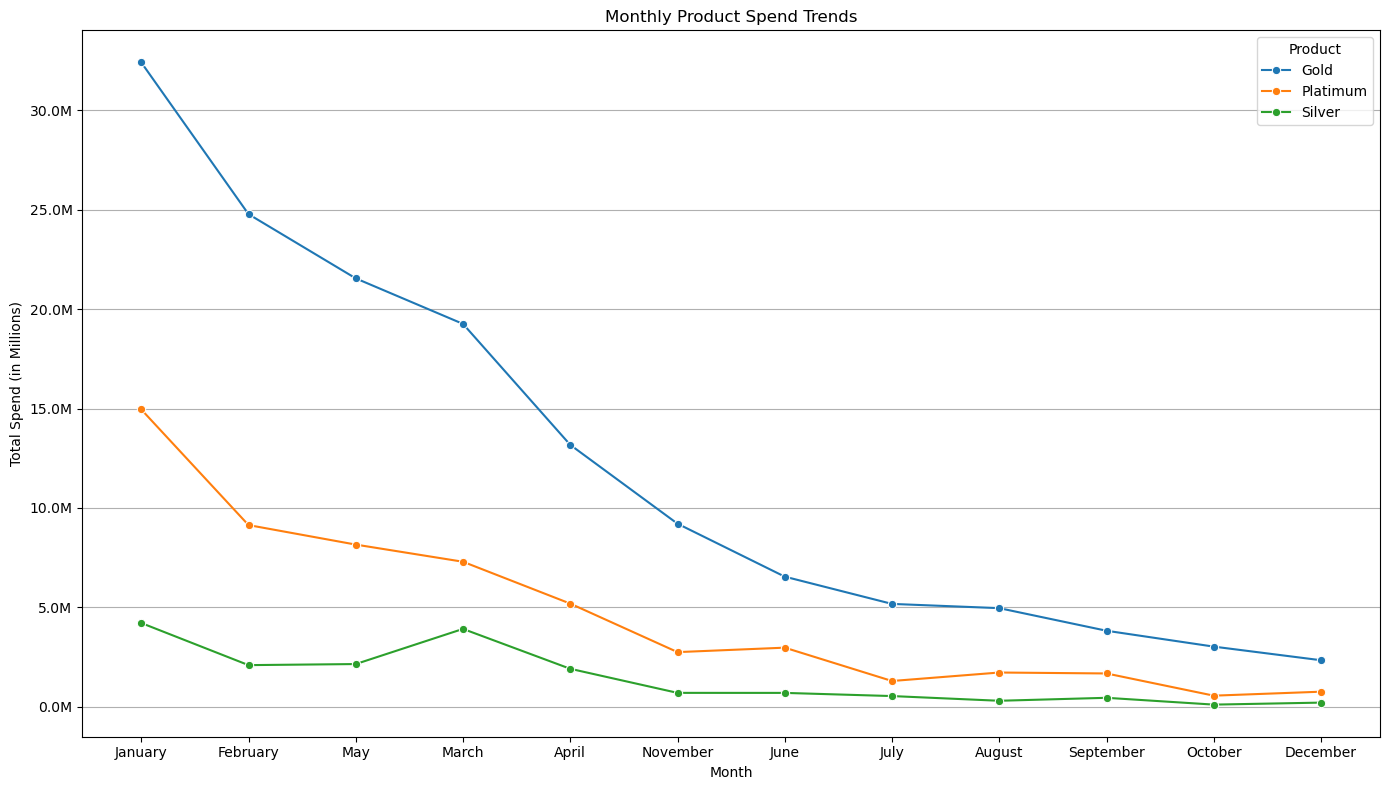

In [55]:
monthly_product_spend = merge_df.groupby([merge_df['Month'].dt.strftime('%B'), 'Product'])['Amount'].sum().sort_values(ascending=False).reset_index()


plt.figure(figsize=(14, 8))
sns.lineplot(monthly_product_spend, x='Month', y='Amount', hue='Product', marker='o')

plt.title('Monthly Product Spend Trends')
plt.xlabel('Month')
plt.ylabel('Total Spend (in Millions)')
plt.grid(True, axis='y')

# Format y-axis in millions
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))


plt.tight_layout()
plt.savefig('.././graphs/monthly_product_spend.png')
plt.show()

## 🔁 Custom Python Function

A dynamic function is implemented to identify **top 10 customers per city**, based on:

- Selected **product type** (Gold/Silver/Platinum)
- **Time frame** (monthly/yearly)

This function allows flexible querying for targeted marketing and performance tracking.

In [56]:
payment_merge = payment.merge(cust, on='Customer')


def top_10_customer_by_city(product='gold', time_frame='yearly'):
    # Filtering by Product
    filtered_payment = payment_merge[payment_merge['Product'].str.lower() == product.lower()]

    # Extracting Time Frame
    if time_frame.lower() == 'yearly':
        filtered_payment['Period'] = filtered_payment['Month'].dt.to_period('Y')
    elif time_frame.lower() == 'monthly':
        filtered_payment['Period'] = filtered_payment['Month'].dt.to_period('M')
    else:
        raise ValueError("Time Frame must be 'Yearly' or 'Monthly'")
    
    # Grouping by City, Period, Customer
    grouped = filtered_payment.groupby(['City', 'Period', 'Customer'])['Amount'].sum().reset_index()

    # Ranking the Customers
    grouped['Rank'] = grouped.groupby(['City', 'Period'])['Amount'].rank(method='first', ascending=False)
    top10 = grouped[grouped['Rank'] <= 10].sort_values(['City', 'Period', 'Rank'])

    return top10

In [57]:
print(top_10_customer_by_city(product='Platimum', time_frame='monthly'))

           City   Period Customer     Amount  Rank
1     BANGALORE  2004-01      A37  500008.58   1.0
3     BANGALORE  2004-01      A52  263853.18   2.0
2     BANGALORE  2004-01       A5   60012.00   3.0
0     BANGALORE  2004-01      A19   40000.00   4.0
4     BANGALORE  2004-05      A37  144582.08   1.0
..          ...      ...      ...        ...   ...
311  TRIVANDRUM  2006-05      A39   73591.59   1.0
312  TRIVANDRUM  2006-05      A48   20002.00   2.0
313  TRIVANDRUM  2006-11      A39  161732.09   1.0
314  TRIVANDRUM  2006-11      A48   10001.00   2.0
315  TRIVANDRUM  2006-12      A39  278687.47   1.0

[316 rows x 5 columns]


/var/folders/pd/fxfkck150490_zvd1gg4syk00000gn/T/ipykernel_42528/3987572160.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_payment['Period'] = filtered_payment['Month'].dt.to_period('M')
